# Data Science with Python: Day 2
**UO Library Data Services workshop**

<img align="left" width="300" height="300" src="https://www.python.org/static/community_logos/python-logo-master-v3-TM.png">

### A more realistic data analysis workflow

**Import modules**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Read in some data**

mtcars dataset:

Henderson and Velleman (1981), Building multiple regression models interactively. Biometrics, 37, 391–411.

| colname | description |
| :---: | :---: |
| **mpg** | Miles/(US) gallon |
| **cyl** |	Number of cylinders |
| **disp** | Displacement (cu.in.) |
| **hp** | Gross horsepower |
| **drat** | Rear axle ratio |
| **wt** | Weight (1000 lbs) |
| **qsec** | 1/4 mile time |
| **vs** | Engine (0 = V-shaped, 1 = straight) |
| **am** | Transmission (0 = automatic, 1 = manual) |
| **gear** | Number of forward gears |
| **carb** | Number of carburetors |

In [2]:
# Make sure the input file is your working dir
cars = pd.read_csv("./mtcars.csv", index_col = 0)
cars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [3]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, Mazda RX4 to Volvo 142E
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   cyl     32 non-null     int64  
 2   disp    32 non-null     float64
 3   hp      32 non-null     int64  
 4   drat    32 non-null     float64
 5   wt      32 non-null     float64
 6   qsec    32 non-null     float64
 7   vs      32 non-null     int64  
 8   am      32 non-null     int64  
 9   gear    32 non-null     int64  
 10  carb    32 non-null     int64  
dtypes: float64(5), int64(6)
memory usage: 3.0+ KB


***
**Interlude: Some weird Pandas quirks**

In [4]:
# loc and iloc methods can be used for more complex subsetting and indexing
manual_6cyl = cars.loc[(cars["am"] == 1) &
                       (cars["cyl"] == 6)]

manual_6cyl.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Ferrari Dino,19.7,6,145.0,175,3.62,2.770,15.50,0,1,5,6


In [5]:
# error! this subsetted df is pointing to the original in memory
manual_6cyl["test"] = 0

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [6]:
# instead, explicitly make a copy
man6cyl_copy = cars.copy()
man6cyl_copy = man6cyl_copy.loc[(man6cyl_copy["am"] == 1) &
                                (man6cyl_copy["cyl"] == 6)]
man6cyl_copy["test"] = 0

man6cyl_copy.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,test
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,0
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,0
Ferrari Dino,19.7,6,145.0,175,3.62,2.770,15.50,0,1,5,6,0


In [6]:
cars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


Read more about deep v. shallow copies here:

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.copy.html

***

**Explore the data you're interested in**

In [26]:
cars["mpg"].describe()

count    32.000000
mean     20.090625
std       6.026948
min      10.400000
25%      15.425000
50%      19.200000
75%      22.800000
max      33.900000
Name: mpg, dtype: float64

Group-by method

In [42]:
cars_by_cyl = cars.groupby("cyl")
cars_by_cyl["mpg"].describe()

,count,mean,std,min,25%,50%,75%,max
cyl,,,,,,,,
4,11.0,26.663636,4.509828,21.4,22.80,26.0,30.40,33.9
6,7.0,19.742857,1.453567,17.8,18.65,19.7,21.00,21.4
8,14.0,15.100000,2.560048,10.4,14.40,15.2,16.25,19.2


**Make some basic plots with Matplotlib**

Histogram

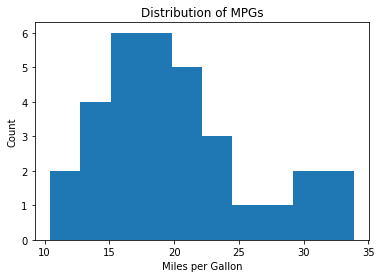

In [7]:
mpg_hist = plt.hist(cars["mpg"])
plt.title("Distribution of MPGs")
plt.xlabel("Miles per Gallon")
plt.ylabel("Count")
plt.show(mpg_hist)

Boxplots

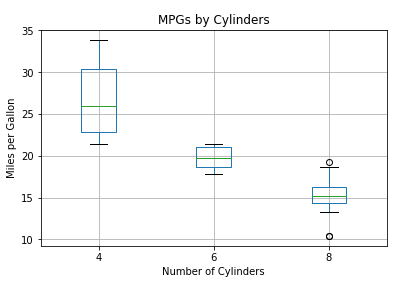

In [46]:
# Pandas dataframes have some plotting methods that invoke
mpgBox = cars.boxplot(column = "mpg", by = "cyl")
plt.title("MPGs by Cylinders")
plt.xlabel("Number of Cylinders")
plt.ylabel("Miles per Gallon")
plt.suptitle(' ') # supresses default title
plt.show(mpgBox)

Matplotlib object oriented approach

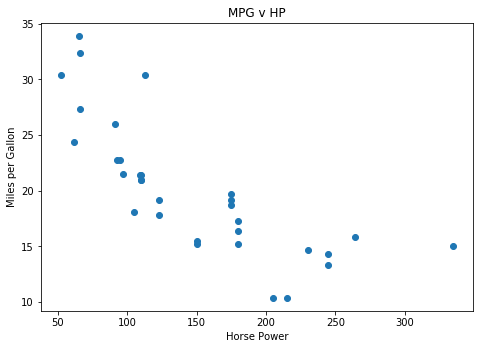

In [6]:

fig = plt.figure()

ax = fig.add_axes([0, 0, 1, 1]) 

ax.scatter(cars["hp"], cars["mpg"])
ax.set_xlabel('Horse Power') 
ax.set_ylabel('Miles per Gallon')
ax.set_title('MPG v HP')
plt.show(fig)

Creating subplots

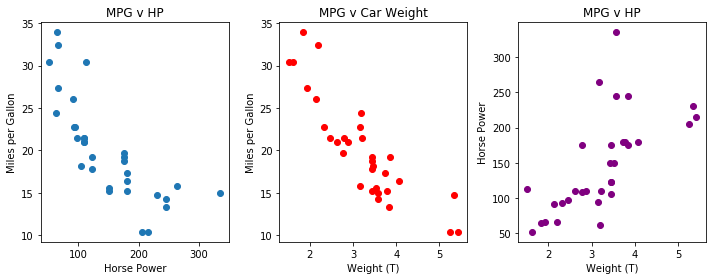

In [17]:
# initialize two side-by-side plot surfaces
fig2, axes = plt.subplots(1, 3, figsize = (10,4))

# first plot
axes[0].scatter(cars["hp"], cars["mpg"])
axes[0].set_xlabel('Horse Power') 
axes[0].set_ylabel('Miles per Gallon')
axes[0].set_title('MPG v HP')

# second plot
axes[1].scatter(cars["wt"], cars["mpg"], color = "red")
axes[1].set_xlabel('Weight (T)') 
axes[1].set_ylabel('Miles per Gallon')
axes[1].set_title('MPG v Car Weight')

# third plot
axes[2].scatter(cars["wt"], cars["hp"], color = "purple")
axes[2].set_xlabel('Weight (T)') 
axes[2].set_ylabel('Horse Power')
axes[2].set_title('HP v Weight')

fig2.tight_layout()

**Some more complex plotting with Seaborn**

Boxplot with multiple groupings

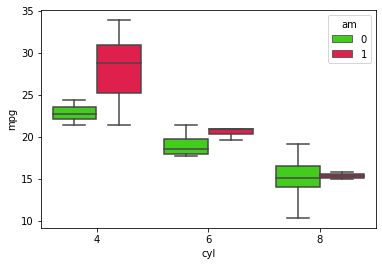

In [41]:
sns.boxplot(x="cyl", y="mpg", hue="am",data=cars, palette="prism")

Linear regression

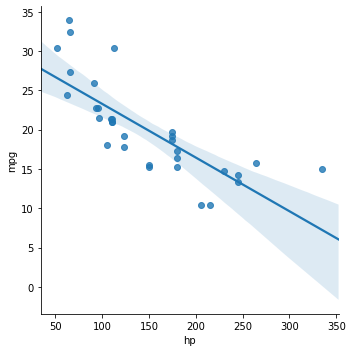

In [7]:
sns.lmplot(x='hp',y='mpg',data=cars)

Linear regression by group

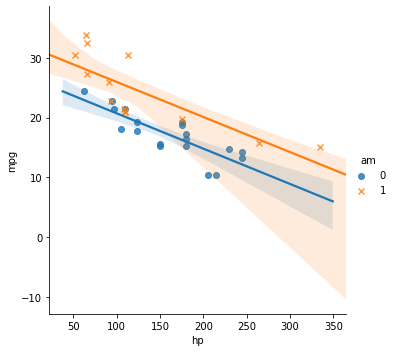

In [10]:
sns.lmplot(x='hp',y='mpg',hue = "am", markers = ["o", "x"], data=cars)